In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_theme(style="darkgrid")


import spacy
from spacymoji import Emoji

import csv
import re
import pandas as pd
import emoji
import regex
from collections import Counter

from tqdm import tqdm


import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display



import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')


import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rabee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#EXPLORATORY ARABIC OFFENSIVE LANGUAGE DATASET ANALYSIS

# import he data

In [277]:
#get the dataset from githup using raw
url='https://raw.githubusercontent.com/Hala-Mulki/L-HSAB-First-Arabic-Levantine-HateSpeech-Dataset/master/Dataset/L-HSAB'
origin_ds=pd.read_table(url,encoding='utf-8')
origin_ds['Tweet']=origin_ds['Tweet'].astype('category')
origin_ds.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive


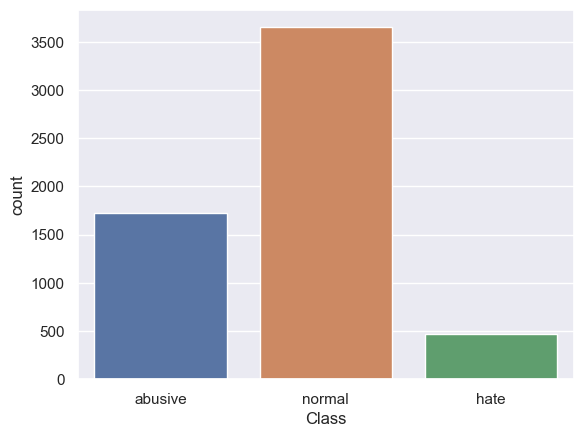

In [278]:
#Class distribution for the L_HSAB
ax=sns.countplot(x='Class', data=origin_ds)



In [279]:
catagories=origin_ds['Class'].unique().tolist()
catagories

['abusive', 'normal', 'hate']

In [280]:
#count the number of dublicates
print(origin_ds['Tweet'].duplicated().sum())

92


# wordcloud

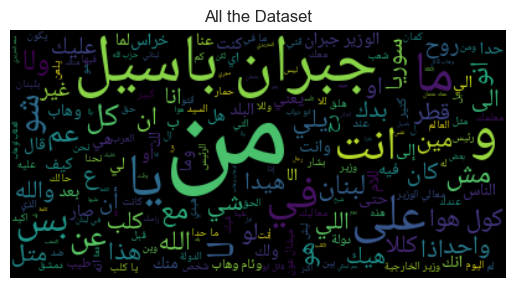

In [281]:
tweet_text=' '.join(origin_ds['Tweet'])
tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic.ttf').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('All the Dataset')
plt.show()

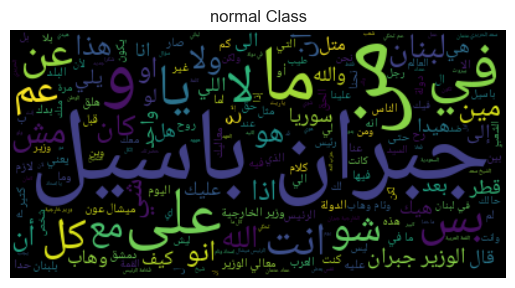

In [282]:
tweet_text=' '.join(origin_ds[origin_ds.Class=='normal']['Tweet'])
tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic.ttf').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('normal Class')
plt.show()

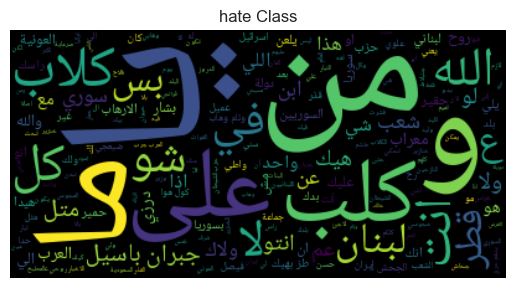

In [283]:
tweet_text=' '.join(origin_ds[origin_ds.Class=='hate']['Tweet'])
tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic.ttf').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('hate Class')
plt.show()

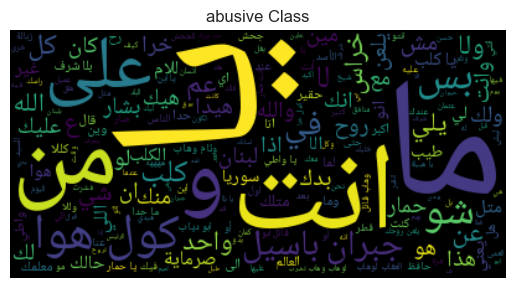

In [284]:
tweet_text=' '.join(origin_ds[origin_ds.Class=='abusive']['Tweet'])
tweet_text = arabic_reshaper.reshape(tweet_text)
tweet_text = get_display(tweet_text)
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic.ttf').generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('abusive Class')
plt.show()

# most frequents words

In [285]:
#remove stop words from the dataframe and addint it new column
copy_origin_ds=origin_ds
copy_origin_ds['tweet_without_stopwords'] = copy_origin_ds['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('arabic'))]))
copy_origin_ds

,Tweet,Class,tweet_without_stopwords
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive,الوزير جبران باسيل تاج راسك جربان ممنوع اليوم ...
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal,صديقي انت ابن جامعه اللعبه اكبر داعش اللعبه سن...
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal,مصلحة لبنان تبدأ باستخراج النفط الغاز لوقف الش...
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive,وليد جنبلاط كاتب الحكمة قذر
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive,شو بتلبقلك كلمة خنزير بتجي مفصله قياسك وشكلك
...,...,...,...
5841,أمير المليشيا مش خائن,normal,أمير المليشيا مش خائن
5842,صدقت يناسبك جدا جدا,normal,صدقت يناسبك جدا جدا
5843,لبخليني حب باسيل شغلتين,normal,لبخليني حب باسيل شغلتين
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,hate,ليش تيوس الإمارت والسعودية السوريين واليمنيين ...


In [286]:
word_df=pd.DataFrame(' '.join(origin_ds['tweet_without_stopwords']).lower().split(),columns=['words'])
word_df

,words
0,الوزير
1,جبران
2,باسيل
3,تاج
4,راسك
...,...
58008,هالكلمة
58009,لنفهم
58010,شو
58011,قال


<BarContainer object of 20 artists>

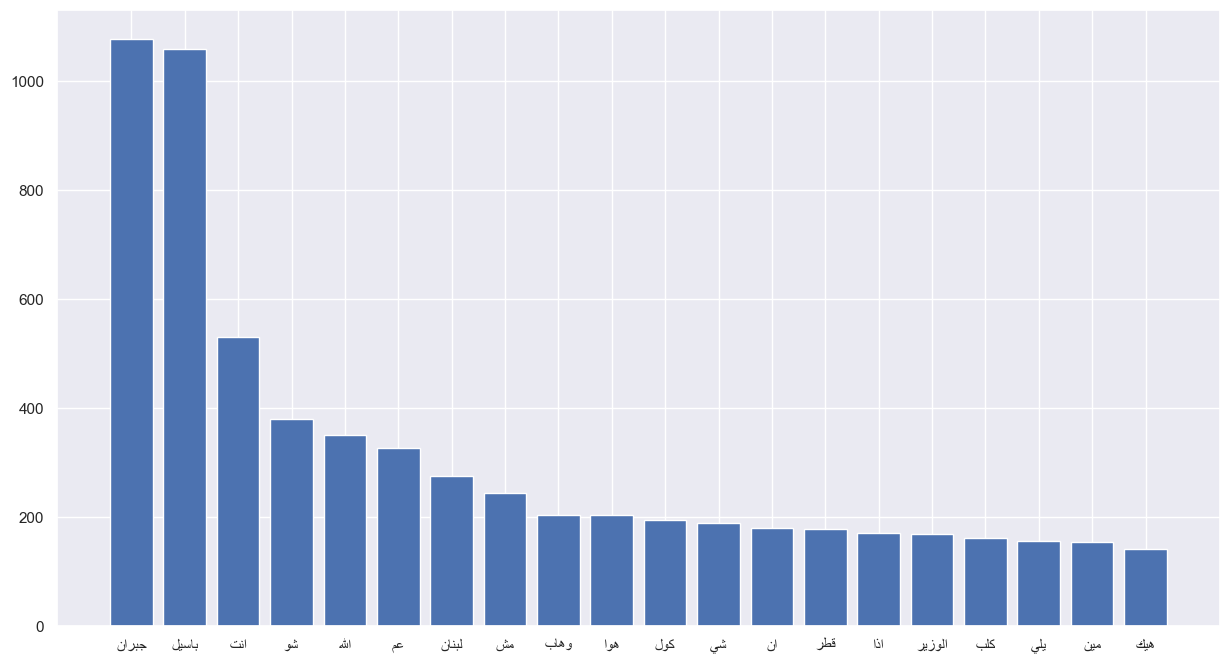

In [305]:
top_all=pd.Series(' '.join(copy_origin_ds['tweet_without_stopwords']).lower().split()).value_counts()[:20].to_dict()
for old_key in list(top_all):
    new_key=arabic_reshaper.reshape(old_key)
    new_key = get_display(new_key)
    top_all[new_key] = top_all.pop(old_key)

plt.figure(figsize=(15,8))
plt.bar(top_all.keys(), top_all.values())



In [288]:
from turtle import width


def GetTopWord(k,hclass):
    word_df=pd.DataFrame(' '.join(copy_origin_ds['tweet_without_stopwords']).lower().split(),columns=['words'])
    top_all=pd.Series(' '.join(copy_origin_ds[copy_origin_ds['Class']==hclass]['tweet_without_stopwords']).lower().split()).value_counts()[:k].to_dict()
    for old_key in list(top_all):
        new_key=arabic_reshaper.reshape(old_key)
        new_key = get_display(new_key)
        top_all[new_key] = top_all.pop(old_key)

    my_df = pd.DataFrame(top_all.items())
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=0, y=1, data=my_df,color='blue')
    ax.set(xlabel = 'tokens', ylabel='%', title=f'Most common {hclass} tokens in the L-HSAB ')
    #plt.bar(top_all.keys(), top_all.values())
    #plt.title(f'top {k} words in the {hclass} class')

    

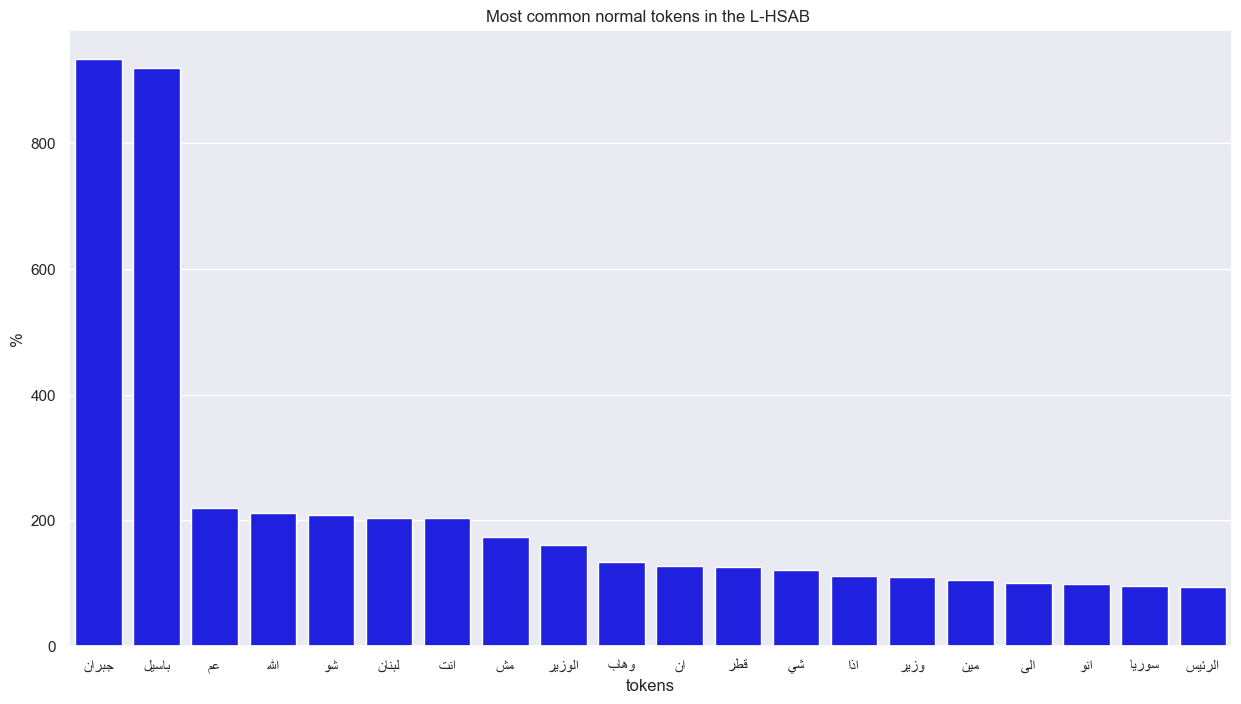

In [289]:
GetTopWord(20,'normal')


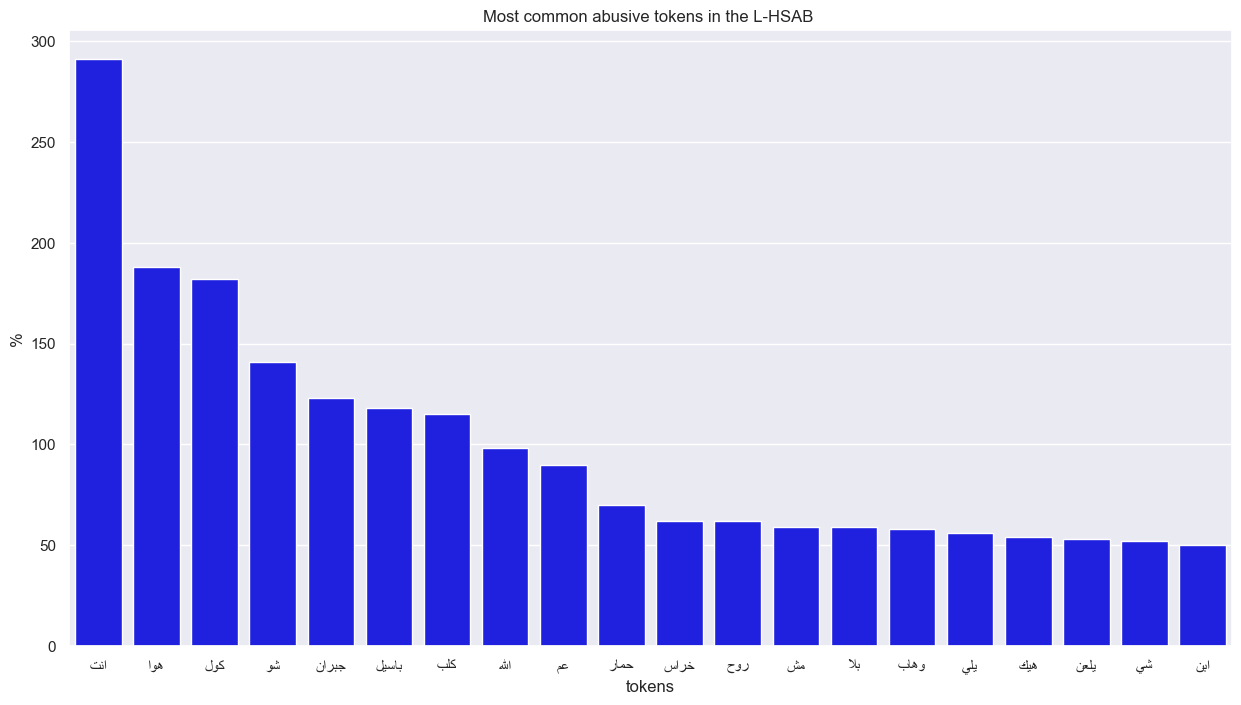

In [290]:
GetTopWord(20,'abusive')


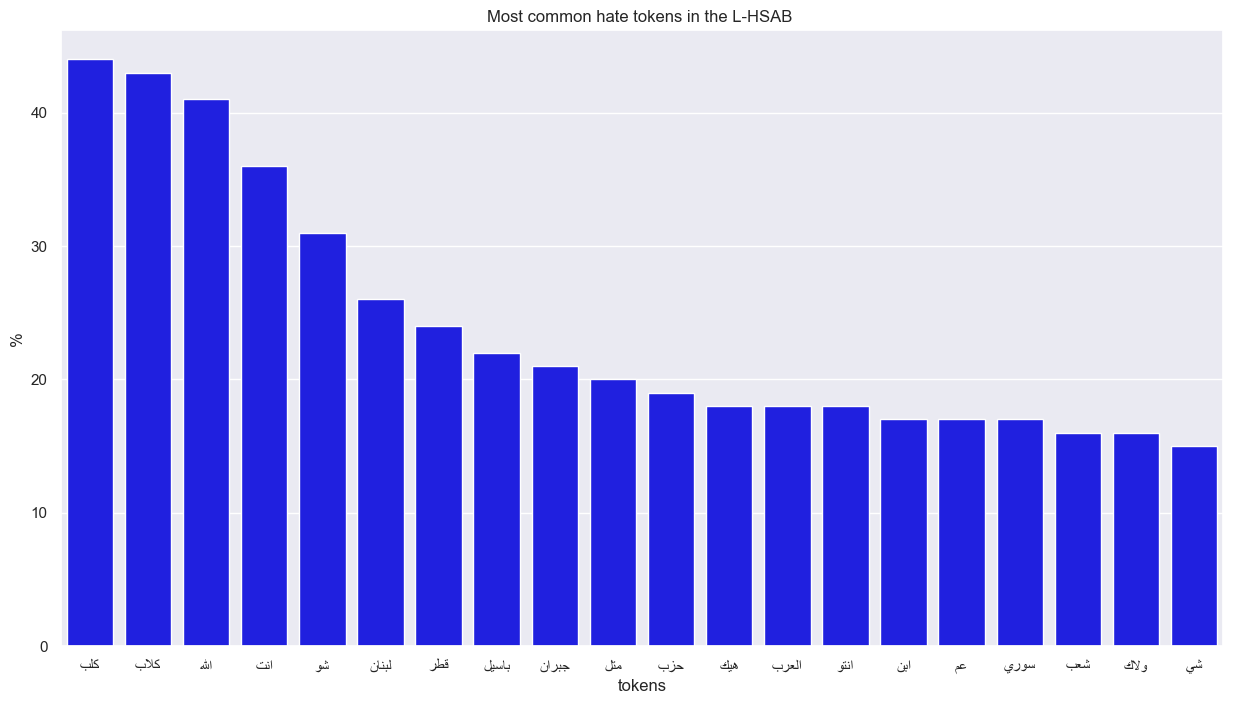

In [291]:
GetTopWord(20,'hate')


# plot emoji count

In [292]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [293]:
text = origin_ds['Tweet']
emoji_list= [] 
for t in text:
  emoji_list=emoji_list+split_count(t)



emojies_dict=dict(Counter(emoji_list))
emoji_counts=pd.DataFrame(emojies_dict.items(),columns=['Emoji','Count'])
emoji_counts.sort_values('Count',ascending=False)[:5]



fig = go.Figure()


fig.add_trace(go.Scatter(y=emoji_counts['Emoji'][:5],
                x=emoji_counts['Count'][:5],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_counts['Emoji'][:5],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=30),
                ))

fig.update_yaxes(visible =False, range=[0, len(emoji_counts)+1])
fig.update_xaxes(title='Number of Times Used')
fig.update_layout(
    autosize=False,height=700)

# number  of  tokens  per  tweet 

<AxesSubplot:xlabel='Class', ylabel='number_of_tokens'>

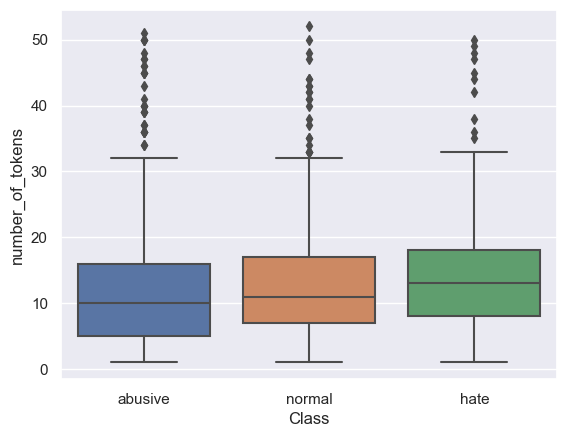

In [322]:
NOTPT_df=origin_ds
NOTPT_df['number_of_tokens'] = NOTPT_df['Tweet'].str.split().str.len()
sns.boxplot(data=NOTPT_df, x='Class', y='number_of_tokens')
